# 216 Kleopatra Example Notebook

Use the Python Interface (v.3.3) and the file `mesh/216Kleopatra.obj` to evaluate this polyhedral gravity model.
First the necessary imports:

In [35]:
import polyhedral_gravity as model
from polyhedral_gravity import Polyhedron, PolyhedronIntegrity, NormalOrientation, GravityEvaluable
import numpy as np
import mesh_plotting
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline
%load_ext autoreload
%autoreload 2

print("Polyhedral Gravity Metadata:")
print(f"Version:                 {model.__version__}")
print(f"Parallelization Backend: {model.__parallelization__}")
print(f"Commit Hash:             {model.__commit__}")
print(f"Logging Level:           {model.__logging__}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Polyhedral Gravity Metadata:
Version:                 3.3rc1
Parallelization Backend: TBB
Commit Hash:             6a048a21
Logging Level:           INFO


We create the polyhedron and plot it:

In [41]:
kleopatra_mesh_file = "./mesh/216Kleopatra.obj"
kleopatra_density = 3.6 # kg/km^3
kleopatra: Polyhedron = Polyhedron(
    polyhedral_source=[kleopatra_mesh_file],
    density=kleopatra_density,
    normal_orientation=NormalOrientation.OUTWARDS,
    integrity_check=PolyhedronIntegrity.DISABLE,
)
vertcies = np.array(kleopatra.vertices)
faces = np.array(kleopatra.faces)

Plotting Triangulation


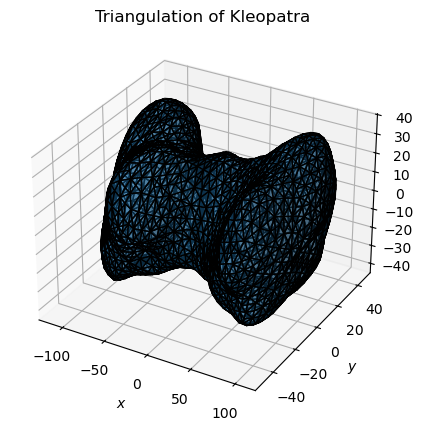

In [42]:
mesh_plotting.plot_triangulation(vertcies, faces, "Triangulation of Kleopatra")

In [43]:
evaluable_kleopatra = GravityEvaluable(kleopatra)
evaluable_kleopatra

<polyhedral_gravity.GravityEvaluable, density=3.6, vertices= 2048, faces= 4092>

In [44]:
X = np. arange (-175, 175, 1)
Y = np.arange(-175, 175, 1)


computation_points = np.array(np.meshgrid(X, Y, [0])).T.reshape(-1, 3)
gravity_results = evaluable_kleopatra(
    computation_points=computation_points,
)

In [45]:
kleoPotentials = np.array([i[0] for i in gravity_results])#.reshape (1,1681)
kleoPotentials = kleoPotentials.reshape((len(X), len(Y)))
X = computation_points[:, 0].reshape(len(X), -1)
Y = computation_points[:, 1].reshape(len(Y), -1)
z = kleoPotentials

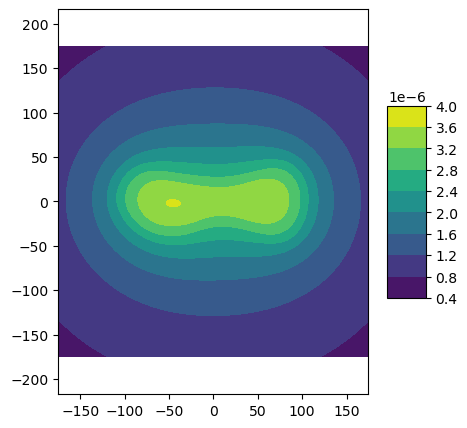

In [47]:
fig, ax = plt.subplots(figsize=(5, 5))


Z = z.reshape((len(X), len(Y)))

surf = ax.contourf(X, Y, Z, cmap=cm.viridis)

ax.axis('equal')

fig.colorbar(surf, aspect=5, orientation='vertical', shrink=0.5)

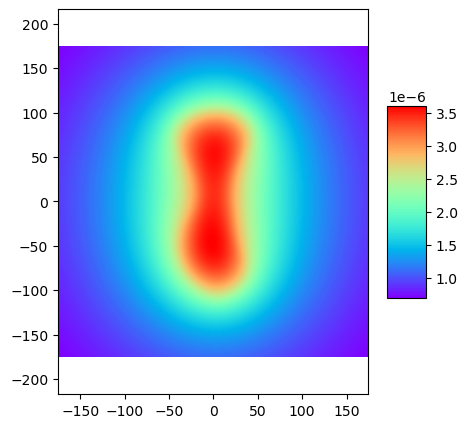

In [48]:
fig, ax = plt.subplots(figsize=(5, 5))

Z = z.reshape((len(X), len(Y)))

# Use imshow to create a continuous gradient plot
cax = ax.imshow(Z, extent=(X.min(), X.max(), Y.min(), Y.max()), origin='lower', cmap=cm.rainbow, aspect='auto')

ax.axis('equal')

fig.colorbar(cax, aspect=5, orientation='vertical', shrink=0.5)

plt.show()